## Table of Contents
- [G5: Model Based Process Control](#G5%3A-Model-Based-Process-Control)
  - [5.1 Definition](#5.1-Definition)
  - [5.2 Concepts](#5.2-Concepts)
  - [5.3 User Stories](#5.3-User-Stories)
- [🏠 Home](../../welcomePage.ipynb)

# G5: Model Based Process Control


In [1]:
Example 

NameError: name 'Example' is not defined

## 5.1 Definition
Model-based process control is a mathematical and visual technique to addressing the challenges associated with designing complex control. This technique involves two key aspects. (a) The control analysis, representing the modeling and simulation aspects of the system including tuning and configuration, and automatic code generation. Each block of the model contains mathematical equations that emulate the behavior of the physical system. (b) The system and software, representing continuous validation and verification through testing, and deployment of the system. In this regard, when model-based control is used efficiently, it offers a single design platform to enhance overall system design. Through virtual prototyping, system engineers can easily see whether the whole system is working as intended, even before the hardware is manufactured and available for testing.


## 5.2 Concepts
<center>
    <img src="../../img/03.jpg" alt="Alt text" width="400">
</center>


## 5.3 User Stories
- [Model Predictive Control](../../Modules/Examples/2.%20Learning%20Modules/2.6.%20Model%20Predictive%20Control/Model%20Predictive%20Control.ipynb) - This module demonstrates calculating a single time step's move trajectory using the same system as the Dahlin controller.

## Example: PID control versus full state feedback control

<center>
    <img src="../img/Module5_Portable-steam-generator.png" alt="The image shows a portable steam generator CAD model with internal view of the steam pipes and tank." width="500">
</center>
Application: Pumped fluid storage is a common method to "even out" the fluctuating demand for a fluid such as a coolant or process water.
A cooling example is the liquid cooling of a portable generator. 
The generator may be automatically throttled up or down in power due to fluctuating demand and to conserve fuel and prolong runtime.
This throttling necessitates control of the flow rate of coolant.
Similarly, a process water example of evening out flow is in the feeding of water into a once-through steam generator for enhanced oil recovery (EOR) or creation of an enhanced geothermal system (EGS).
In these techniques, the steam generator, shown above, is brought to a site for injection of the produced steam into a well in the ground.
An energy source boils the water to produce steam and supplies the steam at a specified pressure and flow rate to the application such as an underground oil formation or  geothermal energy formation under development.
Steam demand, and hence process water demand, may fluctuate due to physical conditions in the underground formation or due to the operating state of the steam generator.

In a pumped fluid storage application, a pump supplies water to a network of two cylindrical tanks for fluid storage or delivery to a process with variable demand. The pump injects water into the larger fluid tank, which is connected to a smaller tank by a shutoff valve (maintained in the open position during process operation).
The smaller tank is connected to the process by another shutoff valve (also maintained in the open position during process operation).
We will use $q$ for flow rate, $h$ for height of water in a tank, $A$ for tank cross-sectional area, and $R$ for hydraulic flow resistance. 
Flow resistance is defined as pressure divided by flow rate, $R = \Delta P / q$, in which $\Delta P$ is the fluid's pressure drop across the hydraulic element, such as a valve, in the direction of flow.
We assign an inlet flow rate $q_\text{input}$ from the pump into the larger tank, labeled tank 1.
The valve between tanks 1 and 2 is labeled with flow resistance $R_1$ and flow rate $q$.
The smaller tank is labeled tank 2.
The valve after tank 2 is labeled with flow resistance $R_2$ and flow rate $q_\text{output}$.

A model based control approach is sought to decide how to operate the pump (how to specify flow rate $q_\text{input}(t)$ so that the output flow rate $q_\text{output}(t)$ achieves the desired output flow rate $q_\text{output, desired}(t)$. This control approach can use sensors to sense the height of water ${h}_1(t)$ or ${h}_2(t)$ in either tank or the flow rate $q(t)$ between tanks.

The volume of water in tank 1 is $A_1 h_1$, and likewise, the volume of water in tank 2 is $A_2 h_2$.
By conservation of volume, the net flow of water into tank 1 is $q_\text{input} - q$. This must equal the rate of change of the volume of water in tank 1, which is $\frac{d}{dt}\left(A_1 h_1\right) = A_1 \dot{h}_1$.
Notice that the overdot indicates a time rate of change, and that the cross-sectional area of the tank is not changing in time while the height of the water column in the tank is changing in time.
You might pronounce $\dot{h}_1$ as "H one dot".
For tank 2, the net flow of water into tank 2 is $q - q_\text{output}$.
So we have two differential equations governing our system:
$$q_\text{input} - q = A_1 \dot{h}_1$$
and
$$q - q_\text{output} = A_2 \dot{h}_2$$
Our dynamic system is not yet complete as we must relate $q$ to some combination of the input signals $q_\text{input}$ and $q_\text{output}$ or state variables ${h}_1$ and ${h}_2$.
We get this equation from the definition the flow resistance for the valve between the tanks.
We need to know the pressure drop between the tanks.
In each tank, the pressure at the bottom of the tank is $P = \rho g h$, in which $\rho$ is the density of the fluid, water, and $g$ is the acceleration due to gravity.
So the pressure difference from the bottom of tank 1 to the bottom of tank 2 is $\Delta P = \rho g \left(h_1 - h_2\right)$.
We now have an equation for $q$, which is $\Delta P = \rho g \left(h_1 - h_2\right) = q R_1$.
We isolate $q$ as:
$$q = \frac{\rho g}{R_1} \left(h_1 - h_2\right)$$
We substitute this $q$ into our system of two differential equations as:
$$q_\text{input} - \frac{\rho g}{R_1}h_1 + \frac{\rho g}{R_1}h_2 = A_1 \dot{h}_1$$
$$\frac{\rho g}{R_1}h_1 - \frac{\rho g}{R_1}h_2 - q_\text{output} = A_2 \dot{h}_2$$

It would appear that we can control both water column heights using both of the input signals.
However, the objective is to supply a specified (desired) flow rate of water at a specified pressure.
Let's examine the second valve (the valve between tank 2 and the outlet that feeds water into the process).
The flow resistance equation for this valve is $\Delta P = R_2 q_\text{output}$. 
We know the pressure at the bottom of tank 2 is $\rho g h_2$. 
The pressure of the water at the outlet should be the process's desired pressure, $P_\text{output}$, which we will assume to be a static variable (consant in time).
Without loss of generality, let us assume this is the ambient pressure $P_\text{output} = 0$.
So, the flow resistance equation for the valve becomes:
$$\rho g h_2 = R_2 q_\text{output}$$
This means that $h_2(t)$ and $q_\text{output}(t)$ cannot be independently controlled.
The value of one determines the value of the other through the preceding equation.
So our system of two differential equations can be combined into one in which one of the tank height variables is eliminated.
The other tank height variable can be eliminated by using the relationship between $h_2(t)$ and $q_\text{output}(t)$, giving the following differential equation from $q_\text{input}(t)$ to $q_\text{output}(t)$.
$$\ddot{q}_\text{output}\left[A_1 A_2 \frac{R_1}{\rho g} \frac{R_2}{\rho g} \right] + \dot{q}_\text{output}\left[A_1 \frac{R_1}{\rho g} + A_2 \frac{R_2}{\rho g} + A_1 \frac{R_2}{\rho g} \right] + q_\text{output}\left[ 1 \right] = q_\text{input}$$
In this equation, the double dot notation above a variable indicates a second derivative with respect to time.
Also, square brackets are used so as to avoid confusion with the notation for functions of time.
We see that the system is a second-order system in the output variable $q_\text{output}(t)$. 
We can design a closed-loop controller for this second order system, which will result in a different transfer function for the closed-loop control system.

Let's use new variables to simplify the coefficients of the system:
$$a = A_1 A_2 \frac{R_1}{\rho g} \frac{R_2}{\rho g}$$
$$b = A_1 \frac{R_1}{\rho g} + A_2 \frac{R_2}{\rho g} + A_1 \frac{R_2}{\rho g}$$
$$c = 1$$
So that the second order system is:
$$\ddot{q}_\text{output}\left[a \right] + \dot{q}_\text{output}\left[b \right] + q_\text{output}\left[ c \right] = q_\text{input}$$
with transfer function:
$$\frac{Q_\text{output}}{Q_\text{input}}(s) = \frac{1}{as^2+bs+c} $$

When a closed loop controller with proportional gain $K$ is used, the closed loop transfer function becomes:
$$\frac{Q_\text{output}}{Q_\text{output,desired}}(s) = \frac{K}{as^2+bs+c+K} $$

One approach for designing this control system (the approach we used in the yellow belt level of this module) was to design a second order transfer function to have the damping ratio $\zeta$ and natural frequency $\omega_n$ which we specify.
This is a valid approach once again.
It would involve writing the transfer function as:
$$\frac{Q_\text{output}}{Q_\text{input}}(s) = \frac{\frac{K}{a}}{s^2+\frac{b}{a}s+\frac{c+K}{a}} $$
Then equating the denominator $s^2+\frac{b}{a}s+\frac{c+K}{a} = s^2+2\zeta\omega_n s+\omega_n^2$.
From there, algebra gives:
$$\omega_n = \sqrt{\frac{c+K}{a}}$$
$$\zeta = \frac{b}{2a\omega_n} = \frac{b}{2a}\sqrt{\frac{a}{c+K}} $$
The speed of response is approximated by the time constant for a second order system $\tau \approx \frac{1}{\zeta\omega}$.
For this system,
$$\tau \approx \frac{1}{\frac{b}{2a\omega_n}\omega_n} = \frac{2a}{b} $$
So the speed of response doesn't depend on $K$ in this analysis, but rather on the design parameters that set $a$ and $b$ such as the cross-sectional areas of the two tanks and the flow resistances of the two valves.
We see that the choice of $K$ specifies the damping ratio $\zeta$, and so the level of overshoot and oscillation of a step response.
In general, these ranges for $\zeta$ describe the systems step response:
* $\zeta>1$: overdamped system with no overshoot or oscillation, but slow response
* $\zeta=1$: critically damped system with no overshoot and no oscillation
* $0.7<\zeta<1$: underdamped system with faster response and slight overshoot without oscillation
* $0<\zeta<0.7$: underdamped system with fastest response but significant overshoot and oscillation
* $\zeta=0$: marginally stable system with undamped oscillating response. This is not physcially realizable as the slightest perturbation will cause the system to move into either the stable ($\zeta>0$) or unstable ($\zeta<0$) regime.
* $\zeta<0$: unstable system whose step response grows to infitinty, possibly with oscillations between large postive and large negative values.

We can also specify the static gain of the system by evaluating its transfer function for $s=0$, giving $\frac{K}{c+K}$. 
We see that the static gain is near 1 (unity) when $K\gg c$ (meaning $K$ is far greater than $c$), giving low error at steady state.
However, low values of $K$ relative to $c$ will have a static gain below 1 and thus will have significant steady state error between the demanded and actual water flow rate.

Let's examine the step response of the system in a simulation of system performance.
m

Simulation of system performance

Set the model parameters
Tank 1 has radius 2 meters.
Tank 2 has radius 3 meters.
Valve $R_1$ has resistance of 10 s/m^2 in pressure head units. 
Valve $R_2$ has resistance of 20 s/m^2 in pressure head units. 

In [2]:
import math
#set model parameters
ρ = 1000 #density of water in kilograms per meter-cubed (you can type greek letters by typing \rho or \pi and pressing tab after the last letter)
g = 9.80655 #gravitaitonal acceleration at sea level in meters per second-squared 
A_1 = 2**2*math.pi #area of tank 1 in meters-squared
A_2 = 3**2*math.pi #area of tank 1 in meters-squared
R_1 = 10*ρ*g # hydraulic resistance of first valve in pascal-seconds per meter-cubed
R_2 = 20*ρ*g # hydraulic resistance of second valve in pascal-seconds per meter-cubed
print(f'A_1 = {A_1:0.3g} meters-squared') #notice that the format specifier with 0.3g gives 3 significant digits. Notice the f before the string as well.
print(f'A_2 = {A_2:0.3g} meters-squared')
print(f'R_1 = {R_1:0.3g} pascal-seconds per meter-cubed')
print(f'R_2 = {R_2:0.3g} pascal-seconds per meter-cubed')

print('model parameters are loaded')

#compute system parameters
a = A_1*A_2*R_1/ρ/g*R_2/ρ/g
b = A_1*R_1/ρ/g+A_2*R_2/ρ/g+ A_1*R_2/ρ/g
c = 1
print(f'a = {a:0.3g} seconds-squared')
print(f'b = {b:0.3g} seconds')
print(f'c = {c:0.3g}, unitless')

A_1 = 12.6 meters-squared
A_2 = 28.3 meters-squared
R_1 = 9.81e+04 pascal-seconds per meter-cubed
R_2 = 1.96e+05 pascal-seconds per meter-cubed
model parameters are loaded
a = 7.11e+04 seconds-squared
b = 942 seconds
c = 1, unitless


Set the proportional error gain to see the step response in the next code block. Notice that the slider is on a logarithmic scale.

In [3]:
#Set gain K to see performance
from ipywidgets import interact,interactive,widgets
from IPython.display import display

gainK = 5
# text_widget = widgets.Text(description="Variable:")
gainKSlider = widgets.FloatLogSlider(
    value=gainK,
    min=-2,
    max=4,
    step=0.001,
    description="Gain K:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)


def update_variable(change):
    global gainK
    gainK = change.new
    # print(f"Variable updated to: {my_variable}")

gainKSlider.observe(update_variable, names='value')
display(gainKSlider)

FloatLogSlider(value=5.0, description='Gain K:', min=-2.0, readout_format='.3f', step=0.001)

ω_n = 0.00919 radians-per-second
ζ = 0.722, unitless


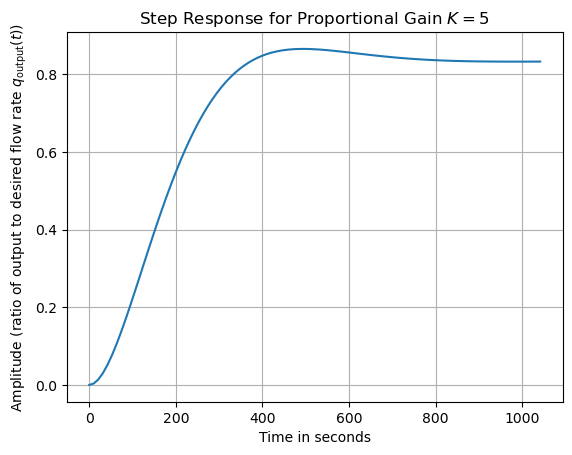

In [4]:
#plot the step response
import numpy as np
import matplotlib.pyplot as plt
import control

K = gainKSlider.value
ω_n = math.sqrt((c+K)/a)
ζ = (b)/(2*a*ω_n)
print(f'ω_n = {ω_n:0.3g} radians-per-second')
print(f'ζ = {ζ:0.3g}, unitless')

# Define the transfer function
num = [K]  # Numerator coefficients
den = [a, b, c+K]  # Denominator coefficients

# alternative calculation for a second order system:
# num = omega_n**2
# den = [1, 2*zetaSlider.value*omega_n, omega_n**2]

tf = control.TransferFunction(num, den)

# Calculate the step response
t, y = control.step_response(tf)

# Plot the step response
plt.plot(t, y)
plt.xlabel("Time in seconds")
plt.ylabel(r"Amplitude (ratio of output to desired flow rate $q_\text{output}(t)$)") #notice the r before the string for a raw string to allow for LaTeX math notation inside the dollar signs
plt.title(rf"Step Response for Proportional Gain $K = {K:0.3g}$")
plt.grid(True)
plt.show()

What does your experimentation show?
* for $K \approx 5$, the step response looks like a first order system with $\zeta \approx 0.7$. It also has a steady state error above 15% as the step response settles to around 0.85. Most of the response is settled by 800 seconds.
* for $K\ll 5$, the step response gets much slower. This is an overdamped system
* for $K\gg 5$, the step response oscillates, giving the problem of overshoot and a long settling time. The steady state error improves (the step response amplitude after settling) gets closer to 1.0. Even a high gain doesn't cause the settling time to decrease from what it was for $K \approx 5$.


This simulation is neat, and it lets us see the response time, but it has some caveats.
Unfortunately, the simulation does not know about physical limitations.
We have put no code into our simulation to tell it that the tank height cannot go below 0 or above some maximum value.
We have put no code into our simulation to tell it that the pump has a minimum and maximum flow rate.
It is quite possible that our simulation is assuming that the pumping flow rate can go negative.

PID controller

Let's implement a PI controller, using the two most common terms of the PID controller.
The integral term is just one term beyond what we've already simulated.
The integral term is known to eliminate steady state error when properly tuned.

We need the differential equation and then transfer function for our PI controller.
The differential equation is:
$$u = K_p e + K_i \int e\,dt$$
As a transfer function, this is 
$$\frac{U}{E}(s) = K_p + \frac{K_i}{s}$$
We can can update our closed loop transfer function 
$$\frac{Q_\text{output}}{Q_\text{input}}(s) = \frac{K}{as^2+bs+c+K} $$
from our earlier analysis with controller gain $K$, now replacing $K$ with $K_p + \frac{K_i}{s}$.
This gives:
$$\frac{Q_\text{output}}{Q_\text{input}}(s) = \frac{K_p + \frac{K_i}{s}}{as^2+bs+c+K_p+\frac{K_i}{s}} $$
Which can be written
$$\frac{Q_\text{output}}{Q_\text{input}}(s) = \frac{K_p s + {K_i}}{as^3+bs^2+\left(c+K_p\right)s+{K_i}} $$
Our previous analysis approach of treating the system as a second-order system to be tuned will not work for this PI controller as the system is now third order.
We can simulate it by identifying the coefficients of the numerator and denominator.
The numerator has coefficients $K_p$ and $K_i$, which you can see in the code.
The denominator has coefficients $a$, $b$, $c+K_p$, and $K_i$, also visible in the code.

In [5]:
#Set gains K_p and K_i to see performance
from ipywidgets import interact,interactive,widgets
from IPython.display import display

gainKP = 5
gainKI = 0.01

gainKPSlider = widgets.FloatLogSlider(
    value=gainKP,
    min=-2,
    max=4,
    step=0.001,
    description="Gain K_p:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3g',
)
gainKISlider = widgets.FloatLogSlider(
    value=gainKI,
    min=-4,
    max=2,
    step=0.0001,
    description="Gain K_i:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3g',
)


def update_variable_K_p(change):
    global gainKP
    gainKP = change.new

def update_variable_K_i(change):
    global gainKI
    gainKI = change.new

gainKPSlider.observe(update_variable_K_p, names='value')
display(gainKPSlider)

gainKISlider.observe(update_variable_K_i, names='value')
display(gainKISlider)

FloatLogSlider(value=5.0, description='Gain K_p:', min=-2.0, step=0.001)

FloatLogSlider(value=0.01, description='Gain K_i:', max=2.0, min=-4.0, step=0.0001)

K_p = 5, unitless
K_i = 0.01, 1/seconds


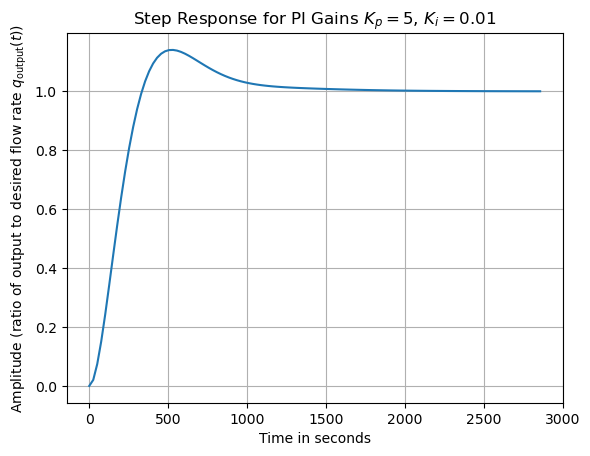

In [6]:
#plot the step response
import numpy as np
import matplotlib.pyplot as plt
import control

K_p = gainKPSlider.value
K_i = gainKISlider.value

print(f'K_p = {K_p:0.4g}, unitless')
print(f'K_i = {K_i:0.4g}, 1/seconds')

# Define the transfer function
num = [K_p, K_i]  # Numerator coefficients
den = [a, b, c+K_p, K_i]  # Denominator coefficients

# alternative calculation for a second order system:
# num = omega_n**2
# den = [1, 2*zetaSlider.value*omega_n, omega_n**2]

tf = control.TransferFunction(num, den)

# Calculate the step response
t, y = control.step_response(tf)

# Plot the step response
plt.plot(t, y)
plt.xlabel("Time in seconds")
plt.ylabel(r"Amplitude (ratio of output to desired flow rate $q_\text{output}(t)$)") #notice the r before the string for a raw string to allow for LaTeX math notation inside the dollar signs
plt.title(rf"Step Response for PI Gains $K_p = {K_p:0.4g}$, $K_i = {K_i:0.4g}$")
plt.grid(True)
plt.show()

You will see that you can get much improved step responses compared to the earlier controller that lacked an integral term.
For one, the settled amplitude of the step response goes to 1, which means zero steady state error.
However, too high of a $K_i$ gain will drive the system unstable, meaning it won't settle in a step response and will instead blow up to a large positive or neative value.
In fact, the ratio of $K_p$ to $K_i$ matters to stability and performance (speed of resposnse, speed of settling).

Again remember that our simulation does not saturate (or clip) the actuator to a maximum or minimum pump flow rate as would be required for physically implementing these designs.

## State Space System Model and Full State Feedback Control
We've derived this dynamic system model:
$$q_\text{input} - \frac{\rho g}{R_1}h_1 + \frac{\rho g}{R_1}h_2 = A_1 \dot{h}_1$$
$$\frac{\rho g}{R_1}h_1 - \frac{\rho g}{R_1}h_2 - q_\text{output} = A_2 \dot{h}_2$$
And this equation relating signal $h_2(t)$ to output $q_\text{output}(t)$: 
$$\rho g h_2 = R_2 q_\text{output}$$
Let's algebraically substitue away $h_2$ from our model, giving
$$A_1 \dot{h}_1 = q_\text{input} - \frac{\rho g}{R_1}h_1 + \frac{R_2}{R_1}q_\text{output} $$
$$\frac{A_2 R_2}{\rho g}\dot q_\text{output} = \frac{\rho g}{R_1}h_1 - \frac{R_2}{R_1}q_\text{output} - q_\text{output}$$
Additional algebra gives:
$$\dot q_\text{output} =  - \frac{\rho g\left(R_1+R_2\right)}{A_2 R_1 R_2}q_\text{output} + \frac{\left(\rho g\right)^2}{A_2 R_1 R_2}h_1$$
$$\dot{h}_1 = \frac{R_2}{A_1 R_1}q_\text{output} - \frac{\rho g}{A_1 R_1}h_1 + \frac{1}{A_1}q_\text{input} $$
This fits the **state space** form of writing two linear differential equations:
$$
\begin{bmatrix}
\dot q_\text{output} \\
\dot{h}_1
\end{bmatrix} 
= 
\begin{bmatrix}
a_{11} & a_{12}  \\
a_{21} & a_{22} 
\end{bmatrix} 
\begin{bmatrix}
q_\text{output} \\
h_1
\end{bmatrix} 
+
\begin{bmatrix}
b_{11}  \\
b_{21} 
\end{bmatrix} 
\begin{bmatrix}
q_\text{input} \\
0
\end{bmatrix} 
$$
Recalling the multiplication of matrices, we see that our system of two differential equations fits:
$$
\begin{bmatrix}
\dot q_\text{output} \\
\dot{h}_1
\end{bmatrix} 
= 
\begin{bmatrix}
- \frac{\rho g\left(R_1+R_2\right)}{A_2 R_1 R_2} & \frac{\left(\rho g\right)^2}{A_2 R_1 R_2} \\
\frac{R_2}{A_1 R_1} & - \frac{\rho g}{A_1 R_1} 
\end{bmatrix} 
\begin{bmatrix}
q_\text{output} \\
h_1
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\frac{1}{A_1}
\end{bmatrix} 
\begin{bmatrix}
q_\text{input} \\
0
\end{bmatrix} 
$$
So that 
$$a_{11} = - \frac{\rho g\left(R_1+R_2\right)}{A_2 R_1 R_2}$$
$$a_{12} = \frac{\left(\rho g\right)^2}{A_2 R_1 R_2}$$
$$a_{21} = \frac{R_2}{A_1 R_1}$$
$$a_{22} = - \frac{\rho g}{A_1 R_1}$$
$$b_{21} = \frac{1}{A_1}$$

We define a state vector 
$$ \boldsymbol{x} = 
\begin{bmatrix}
q_\text{output} \\
h_1
\end{bmatrix} $$
and input vector
$$ \boldsymbol{u} = 
\begin{bmatrix}
q_\text{input} \\
0
\end{bmatrix}  $$
And matrices:
$$ \boldsymbol{A} =
\begin{bmatrix}
a_{11} & a_{12}  \\
a_{21} & a_{22} 
\end{bmatrix} 
$$
$$ \boldsymbol{B} =
\begin{bmatrix}
b_{11} \\
b_{21} 
\end{bmatrix} 
$$

Let's now determine the numerical value of the $\boldsymbol{A}$ and $\boldsymbol{B}$ matrices.

In [7]:
import numpy as np
a_11 = - (ρ*g*(R_1+R_2))/(A_2*R_1*R_2)
a_12 = ((ρ*g)**2)/(A_2*R_1*R_2)
a_21 = R_2/(A_1*R_1)
a_22 = - (ρ*g)/(A_1*R_1)

b_11 = 0
b_21 = 1/A_1


A_matrix = np.array([[a_11, a_12], [a_21, a_22]])
print(f"The A matrix is \n{A_matrix}.")
B_matrix = np.array([[b_11], [b_21]])
print(f"The B matrix is \n{B_matrix}.")


The A matrix is 
[[-0.00530516  0.00017684]
 [ 0.15915494 -0.00795775]].
The B matrix is 
[[0.        ]
 [0.07957747]].


Of course, each of these numbers has a dimension and a unit. 
It is customary for control engineers to only present the value, but it would be better to carry the units aound to prevent errors.

In [8]:
Co = control.ctrb(A_matrix, B_matrix)

# Print the controllability matrix
print(f"The controllability matrix Co is \n{Co}.")

# Check the rank of the controllability matrix
rank_Co = np.linalg.matrix_rank(Co)
print(f"Rank of Co: {rank_Co}")

# Determine controllability
n = A_matrix.shape[0] # System order (number of states)
if rank_Co == n:
  print("The system is controllable")
else:
  print("The system is not controllable")

The controllability matrix Co is 
[[ 0.00000000e+00  1.40723866e-05]
 [ 7.95774715e-02 -6.33257398e-04]].
Rank of Co: 2
The system is controllable


Since the system is controllable, we can use a pole placement method to set the two poles of our system.
Let's place both poles around $s=-0.01$, meaning that the closed loop system will have the transient response of a faster system without oscillation.

In [21]:
# Define the open loop transfer function
# num = [1]
# den = [a, b, c]
# G = control.TransferFunction(num, den)

# # Calculate the poles of the open loop transfer function
# poles = control.poles(G)

# # Plot the root locus
# rlist, klist = control.root_locus(G, plot=True)

# # Show the plot
# plt.show()


from scipy.signal import place_poles
# Desired pole locations
desired_poles = np.array([-0.01, -(0.01*(1+1e-6))]) #the function won't let me use the same value for each pole, so I make the values slightly different

# Calculate the gain matrix K
results = place_poles(A_matrix, B_matrix, desired_poles)
K_gain_matrix = results.gain_matrix

# Verify the closed-loop poles
A_cl = A_matrix - B_matrix @ K_gain_matrix
closed_loop_poles = np.linalg.eigvals(A_cl)

print("Gain matrix K:\n", K_gain_matrix)
print("Closed-loop poles:\n", closed_loop_poles)

Gain matrix K:
 [[3.56629614 0.08466087]]
Closed-loop poles:
 [-0.01       -0.01000001]


The full state feedback gain matrix is to be used to compute the input:
$$\boldsymbol{u} = \boldsymbol{K}\boldsymbol{x} $$
So each element of $\boldsymbol{u}$ is related to one or more elements of the state vector $\boldsymbol{x}$ through the matrix entries in the gain matrix $\boldsymbol{K}$.
This answers the question of how to control the pump flow rate $q_\text{input}$, which is an element of $\boldsymbol{u}$.
The answer is to invest in two sensors.
One sensor measures $h_1(t)$ and the other sensor measures $q_\text{output}(t)$.
In fact, since we know the static relationship between $h_2(t)$ and $q_\text{output}(t)$, we can use a sensor on $h_2(t)$ to give a proxy measurement for $q_\text{output}(t)$.
These sensors can be flowmeters (for $q$ variables) or water column height sensors (for $h$ variables).
There are multiple types of sensors to measure either of those types of variables, each sensor type with its own physical working principle, pros, and cons.

Let's now simulate the step response of our closed loop system using this tuned full state feedback control.

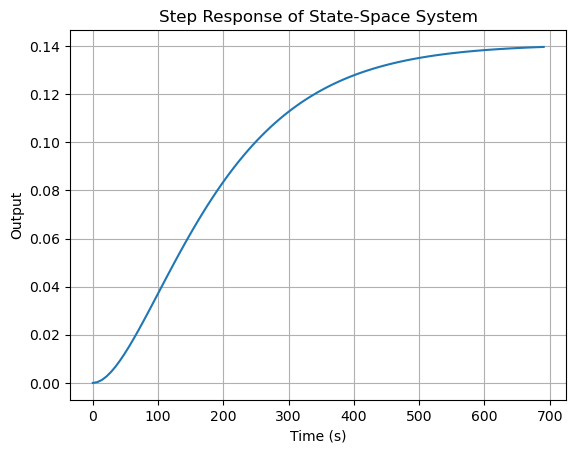

In [22]:
# Define state-space matrices
A = A_matrix - B_matrix @ K_gain_matrix
B = B_matrix
C = np.array([[1, 0]]) #we want to see only q_output
D = np.array([[0]])

# Create state-space object
sys = control.ss(A, B, C, D)

# Simulate step response
T, yout = control.step_response(sys)

# Plot step response
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Step Response of State-Space System")
plt.grid(True)
plt.show()

Observations
This response, which we were able to design by placing poles, is definitely faster than the PI controller implmentation.
Is it feasible? we would have to check our input signal for saturation at actuator limits to know this.

Now you try: adjust the pole, design the controller and simulate the step response.

In [23]:
#Set pole values to see performance
from ipywidgets import interact,interactive,widgets
from IPython.display import display

targetTimeConstantSeconds =100

targetTimeConstantSlider = widgets.FloatLogSlider(
    value=targetTimeConstantSeconds,
    min=1,
    max=5,
    step=0.1,
    description="Target τ:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3g',
)


def update_variable_targetTimeConstant(change):
    global targetTimeConstantSeconds
    targetTimeConstantSeconds = change.new

targetTimeConstantSlider.observe(update_variable_targetTimeConstant, names='value')
display(targetTimeConstantSlider)


FloatLogSlider(value=100.0, description='Target τ:', max=5.0, min=1.0)

The target time constant in seconds is 100.
Gain matrix K:
 [[17.34479505  0.33598791]]
Closed-loop poles:
 [-0.01999998 -0.02      ]


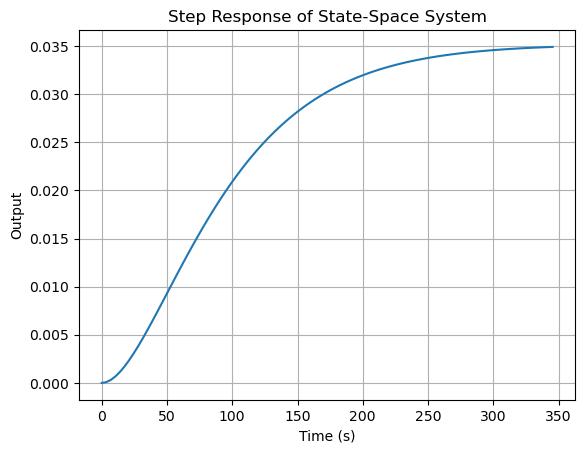

In [24]:
print(f"The target time constant in seconds is {targetTimeConstantSeconds:0.3g}.")

# Desired pole locations
desired_poles = np.array([-2/targetTimeConstantSeconds, -2/(targetTimeConstantSeconds*(1+1e-6))]) #the function won't let me use the same value for each pole, so I make the values slightly different

# Calculate the gain matrix K
results = place_poles(A_matrix, B_matrix, desired_poles)
K_gain_matrix = results.gain_matrix

# Verify the closed-loop poles
A_cl = A_matrix - B_matrix @ K_gain_matrix
closed_loop_poles = np.linalg.eigvals(A_cl)

print("Gain matrix K:\n", K_gain_matrix)
print("Closed-loop poles:\n", closed_loop_poles)

# Define state-space matrices
A = A_matrix - B_matrix @ K_gain_matrix
B = B_matrix
C = np.array([[1, 0]]) #we want to see only q_output
D = np.array([[0]])

# Create state-space object
sys = control.ss(A, B, C, D)

# Simulate step response
T, yout = control.step_response(sys)

# Plot step response
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Step Response of State-Space System")
plt.grid(True)
plt.show()

### <center>[◀︎ Module 4](Module4.ipynb)     [🏠 Home](../../welcomePage.ipynb)     [Module 6 ▶︎](Module6.ipynb)</center>